In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preprocessed-telco-dataset/df.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/preprocessed-telco-dataset/df.csv")

In [4]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,internet_cnt
0,0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.50,No,2
2,2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,3,7795-CFOCW,Male,0,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [5]:
data = df.drop(['Unnamed: 0'], axis=1)

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,internet_cnt
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.50,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,7795-CFOCW,Male,0,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'internet_cnt'],
      dtype='object')

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,internet_cnt
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.038111
std,0.368844,24.545260,30.085974,2266.771362,1.847161
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,2.000000
75%,0.000000,55.000000,89.862500,3794.737500,3.000000
max,1.000000,72.000000,118.750000,8684.800000,6.000000


In [9]:
# Feature dtypes
def df_summary(df):
    '''
    input the dataframe, and it will return a summary table with columns datails.
    '''
    #create a dataframe call summary
    summary = pd.DataFrame(df.dtypes, columns=['dtype'])

    # Number of Missing values (-1 count)
    summary['num_missing'] = df.isna().sum().values    

    # Number of unique values by features
    summary['num_uniques'] = df.nunique().values
    
    return summary

In [10]:
summary = df_summary(data)
summary

,dtype,num_missing,num_uniques
customerID,object,0,7032
gender,object,0,2
SeniorCitizen,int64,0,2
Partner,object,0,2
Dependents,object,0,2
tenure,int64,0,72
PhoneService,object,0,2
InternetService,object,0,3
Contract,object,0,3
PaperlessBilling,object,0,2


In [11]:
# data = df.copy()

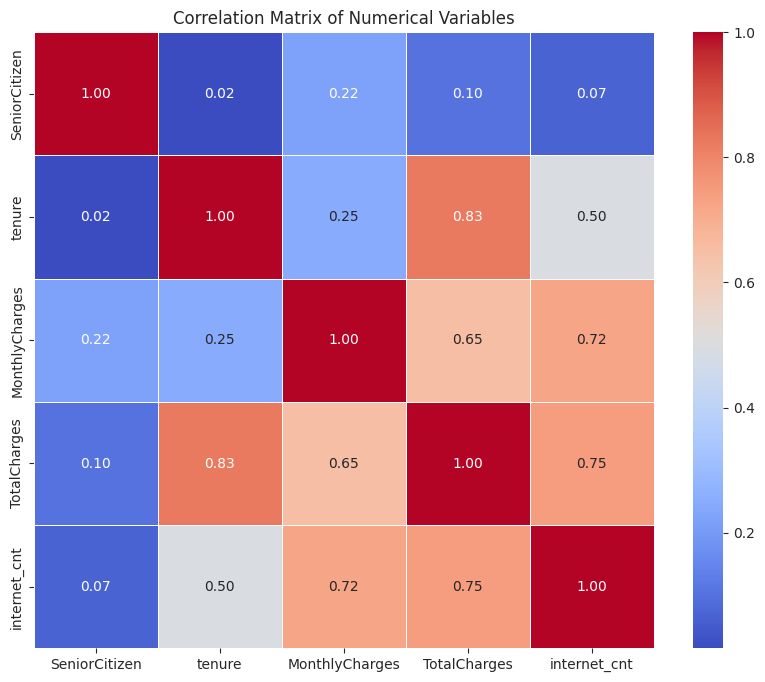

In [12]:
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'internet_cnt']
correlation_matrix = data[numerical_features].corr()

# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [13]:
from scipy.stats import chi2_contingency

# Converting 'Churn' into a numeric format: Yes = 1, No = 0
data['Churn_numeric'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Computing correlation of numerical variables with 'Churn_numeric'
numerical_correlation = data[numerical_features + ['Churn_numeric']].corr()['Churn_numeric'].drop('Churn_numeric')

numerical_correlation

SeniorCitizen     0.150541
tenure           -0.354049
MonthlyCharges    0.192858
TotalCharges     -0.199484
internet_cnt     -0.087882
Name: Churn_numeric, dtype: float64

In [14]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                        'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# 카이제곱
chi_squared_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi_squared_results[feature] = p_value

chi_squared_results

{'gender': 0.4904884707065509,
 'Partner': 3.97379757451591e-36,
 'Dependents': 2.0196592017051303e-42,
 'PhoneService': 0.34992398942431924,
 'InternetService': 5.831198962237274e-159,
 'Contract': 7.326182186265472e-257,
 'PaperlessBilling': 8.236203353962564e-58,
 'PaymentMethod': 1.4263098511063342e-139}

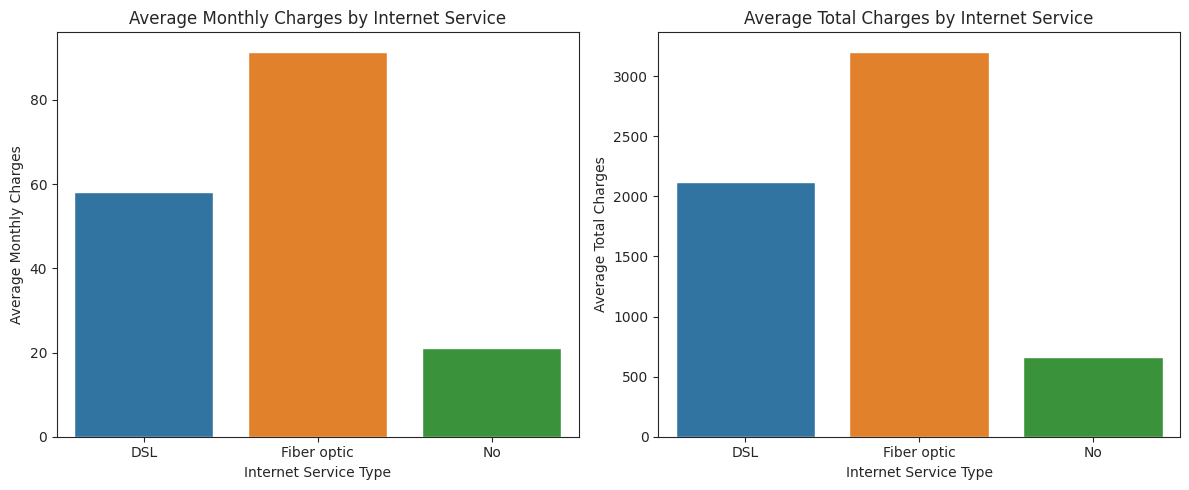

In [15]:
# InternetService 유형별 MonthlyCharges와 TotalCharges의 평균 계산
service_charges = data.groupby('InternetService').agg({'MonthlyCharges': 'mean', 'TotalCharges': 'mean'}).reset_index()

# 바 차트로 시각화
plt.figure(figsize=(12, 5))

# MonthlyCharges
plt.subplot(1, 2, 1)
sns.barplot(x='InternetService', y='MonthlyCharges', data=service_charges)
plt.title('Average Monthly Charges by Internet Service')
plt.ylabel('Average Monthly Charges')
plt.xlabel('Internet Service Type')

# TotalCharges
plt.subplot(1, 2, 2)
sns.barplot(x='InternetService', y='TotalCharges', data=service_charges)
plt.title('Average Total Charges by Internet Service')
plt.ylabel('Average Total Charges')
plt.xlabel('Internet Service Type')

plt.tight_layout()
plt.show()

## 로지스틱 회귀분석

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 더미 변수 생성
data_dummy = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# 수치형 변수 스케일링
# scaler = StandardScaler()
# features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
# data_dummy[features_to_scale] = scaler.fit_transform(data_dummy[features_to_scale])


# 'Churn'을 더미 변수로 포함시키고 이미 변환된 데이터 프레임을 사용
data_dummy = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod', 'gender', 'Partner', 
                                           'Dependents', 'PhoneService', 'PaperlessBilling'], drop_first=True)

# 데이터 분할
X = data_dummy.drop(['customerID', 'Churn', 'Churn_numeric'], axis=1)  # 종속 변수와 식별자 제외
y = data_dummy['Churn_numeric']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# 모델 평가
predictions = logistic_model.predict(X_test)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

report

'              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87      1549\n           1       0.64      0.51      0.57       561\n\n    accuracy                           0.79      2110\n   macro avg       0.74      0.71      0.72      2110\nweighted avg       0.78      0.79      0.79      2110\n'

In [17]:
data = {
    "Precision": {"Class 0": "0.84", "Class 1": "0.64"},
    "Recall": {"Class 0": "0.90", "Class 1": "0.51"},
    "F1-Score": {"Class 0": "0.87", "Class 1": "0.57"},
    "Support": {"Class 0": "1549", "Class 1": "561"}
}
df_metrics = pd.DataFrame(data)
print(df_metrics)


        Precision Recall F1-Score Support
Class 0      0.84   0.90     0.87    1549
Class 1      0.64   0.51     0.57     561


In [18]:
conf_matrix

array([[1389,  160],
       [ 273,  288]])

In [19]:
from sklearn.metrics import roc_auc_score

# 예측 확률 계산
probabilities = logistic_model.predict_proba(X_test)[:, 1]

# AUC 계산
auc = roc_auc_score(y_test, probabilities)
print("AUC: {:.2f}".format(auc))

AUC: 0.83


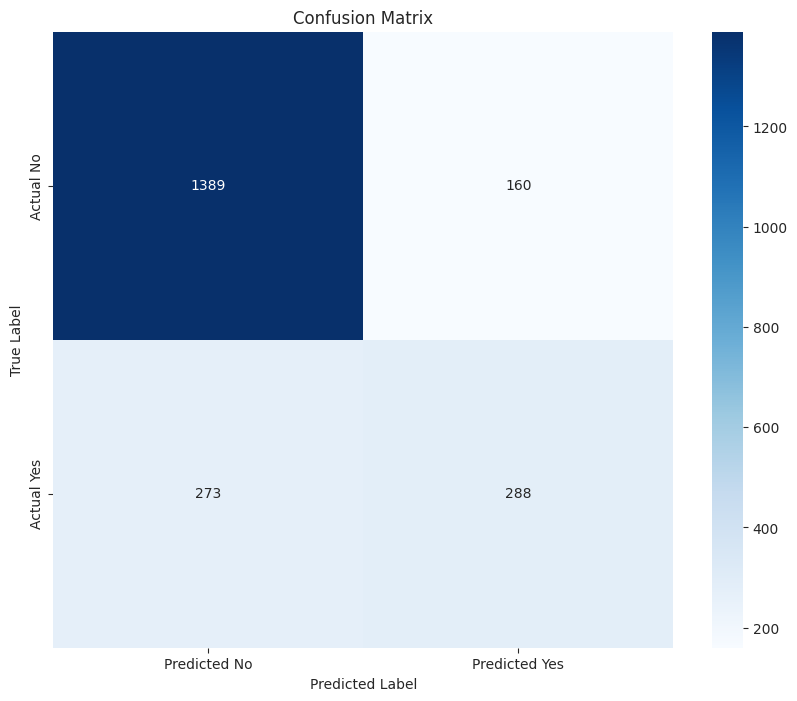

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are already defined and the logistic model is trained
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Extracting coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logistic_model.coef_[0]
})

# Sorting the coefficients by their impact (absolute value)
coefficients = coefficients.sort_values(by="Coefficient", key=abs, ascending=False)

print(coefficients)

                                  Feature  Coefficient
15                       PhoneService_Yes    -0.832537
8                       Contract_Two year    -0.675808
7                       Contract_One year    -0.515989
6                      InternetService_No    -0.499948
0                           SeniorCitizen     0.388612
5             InternetService_Fiber optic     0.382908
16                   PaperlessBilling_Yes     0.338833
14                         Dependents_Yes    -0.267952
9   PaymentMethod_Credit card (automatic)    -0.254242
11             PaymentMethod_Mailed check    -0.235644
4                            internet_cnt    -0.226789
13                            Partner_Yes     0.214709
10         PaymentMethod_Electronic check     0.209456
12                            gender_Male     0.091740
1                                  tenure    -0.067715
2                          MonthlyCharges     0.020060
3                            TotalCharges     0.000352


## 랜덤 포레스트

In [22]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 구성 및 학습
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# 모델 성능 평가
rf_predictions = random_forest_model.predict(X_test)
rf_report = classification_report(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# 변수 중요도 추출
feature_importances = pd.DataFrame(random_forest_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

rf_report, rf_conf_matrix, feature_importances.head(10)


('              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85      1549\n           1       0.59      0.48      0.53       561\n\n    accuracy                           0.77      2110\n   macro avg       0.71      0.68      0.69      2110\nweighted avg       0.76      0.77      0.77      2110\n',
 array([[1360,  189],
        [ 289,  272]]),
                                 importance
 TotalCharges                      0.220517
 MonthlyCharges                    0.214126
 tenure                            0.191787
 internet_cnt                      0.058382
 InternetService_Fiber optic       0.050802
 PaymentMethod_Electronic check    0.036260
 Contract_Two year                 0.034398
 gender_Male                       0.028818
 PaperlessBilling_Yes              0.026323
 Contract_One year                 0.024732)

In [23]:
feature_importances

,importance
TotalCharges,0.220517
MonthlyCharges,0.214126
tenure,0.191787
internet_cnt,0.058382
InternetService_Fiber optic,0.050802
PaymentMethod_Electronic check,0.036260
Contract_Two year,0.034398
gender_Male,0.028818
PaperlessBilling_Yes,0.026323
Contract_One year,0.024732


In [24]:
# 예측 확률 계산
probabilities = random_forest_model.predict_proba(X_test)[:, 1]

# AUC 계산
auc = roc_auc_score(y_test, probabilities)
print("AUC: {:.2f}".format(auc))

AUC: 0.81
